# Task 1) Data Preparation

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## Set file paths
path = r"https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls"
path = path.replace(" ", "%20")

## Load raw csv files
train_df=pd.read_excel(path, sheet_name= 'Training_Data', header=0, usecols=['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'])
train_df.columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']
test_df=pd.read_excel(path, sheet_name= 'Test_Data', header=0, usecols=['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'])
test_df.columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']
all_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

## Check data shape
print('check on first 5 rows:')
print(all_df.head())
print('check on last 5 rows:')
print(all_df.tail())
print('check training data shape:          ' + str(train_df.shape))
print('check test data shape:              ' + str(test_df.shape))
print('check training and test data shape: ' + str(all_df.shape))

check on first 5 rows:
    STG   SCG   STR   LPR   PEG       UNS
0  0.00  0.00  0.00  0.00  0.00  very_low
1  0.08  0.08  0.10  0.24  0.90      High
2  0.06  0.06  0.05  0.25  0.33       Low
3  0.10  0.10  0.15  0.65  0.30    Middle
4  0.08  0.08  0.08  0.98  0.24       Low
check on last 5 rows:
      STG   SCG   STR   LPR   PEG     UNS
398  0.90  0.78  0.62  0.32  0.89    High
399  0.85  0.82  0.66  0.83  0.83    High
400  0.56  0.60  0.77  0.13  0.32     Low
401  0.66  0.68  0.81  0.57  0.57  Middle
402  0.68  0.64  0.79  0.97  0.24  Middle
check training data shape:          (258, 6)
check test data shape:              (145, 6)
check training and test data shape: (403, 6)


In [2]:
## Check any blank data
print('check any blank cells exist:')
print(all_df.isnull().sum())

check any blank cells exist:
STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64


In [3]:
## Check data uniqueness for target value UNS 
print('check data uniqueness for target value UNS:')
print(all_df.groupby(['UNS']).size())

check data uniqueness for target value UNS:
UNS
High        102
Low         129
Middle      122
Very Low     26
very_low     24
dtype: int64


In [4]:
## Correct data entry error: UNS
all_df['UNS'][all_df['UNS']=="very_low"] = "Very Low"

C:\Users\kitwo\AppData\Local\Temp\ipykernel_55224\1984013884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['UNS'][all_df['UNS']=="very_low"] = "Very Low"


In [5]:
## check attribures data range 
print('check attribures data range:')
print(all_df.min())
print(all_df.max())

check attribures data range:
STG     0.0
SCG     0.0
STR     0.0
LPR     0.0
PEG     0.0
UNS    High
dtype: object
STG        0.99
SCG         0.9
STR        0.95
LPR        0.99
PEG        0.99
UNS    Very Low
dtype: object


# Task 2) Data Exploratory

In [6]:
## Check descriptive statistics
print('overall statistics:')
print(all_df.describe())

overall statistics:
              STG         SCG         STR         LPR         PEG
count  403.000000  403.000000  403.000000  403.000000  403.000000
mean     0.353141    0.355940    0.457655    0.431342    0.456360
std      0.212018    0.215531    0.246684    0.257545    0.266775
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.200000    0.265000    0.250000    0.250000
50%      0.300000    0.300000    0.440000    0.330000    0.400000
75%      0.480000    0.510000    0.680000    0.650000    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.990000


In [7]:
## statistics by target value
print('Mean by UNS:')
print(all_df.groupby(['UNS']).mean())
print('Std by UNS:')
print(all_df.groupby(['UNS']).std())

Mean by UNS:
               STG       SCG       STR       LPR       PEG
UNS                                                       
High      0.406902  0.430500  0.509755  0.542941  0.799804
Low       0.326783  0.322798  0.424961  0.449302  0.253589
Middle    0.374574  0.367189  0.491148  0.385656  0.531393
Very Low  0.259180  0.261900  0.354000  0.268820  0.095800
Std by UNS:
               STG       SCG       STR       LPR       PEG
UNS                                                       
High      0.246484  0.244666  0.251658  0.275568  0.109734
Low       0.180934  0.191720  0.251465  0.228628  0.071131
Middle    0.210005  0.207240  0.232856  0.252848  0.130924
Very Low  0.176456  0.178448  0.217715  0.185219  0.055295


In [8]:
## statistics correlation of all columns 
print('Correlation Matrix:')
print(all_df.corr(method ='pearson'))

Correlation Matrix:
          STG       SCG       STR       LPR       PEG
STG  1.000000  0.049023 -0.051889  0.113957  0.198629
SCG  0.049023  1.000000  0.121235  0.119716  0.193566
STR -0.051889  0.121235  1.000000  0.083423  0.148338
LPR  0.113957  0.119716  0.083423  1.000000 -0.039283
PEG  0.198629  0.193566  0.148338 -0.039283  1.000000


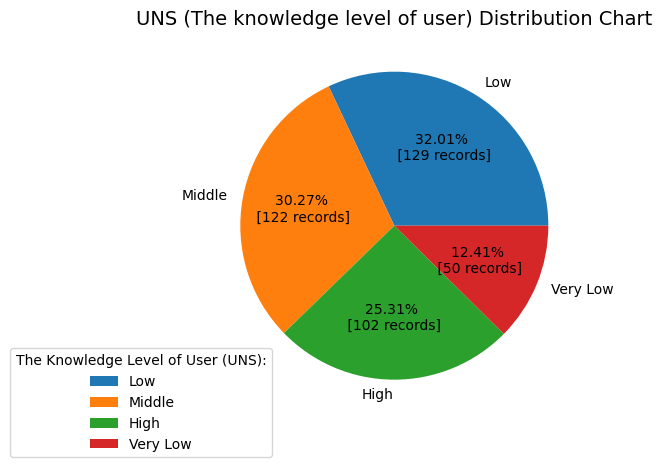

In [9]:
## Number of Count by UNS - Pie Chart
uns_count=all_df['UNS'].value_counts()
uns_count_title = 'UNS (The knowledge level of user) Distribution Chart'
uns_count.plot(kind='pie',autopct=lambda p:f'{p:.2f}% \n [{p*uns_count.sum()/100 :.0f} records] ',  ylabel='',  figsize=(7,5)) 
plt.title(label=uns_count_title,fontsize=14)
plt.legend( bbox_to_anchor = (0.2, 0.2), title='The Knowledge Level of User (UNS):')
plt.show()

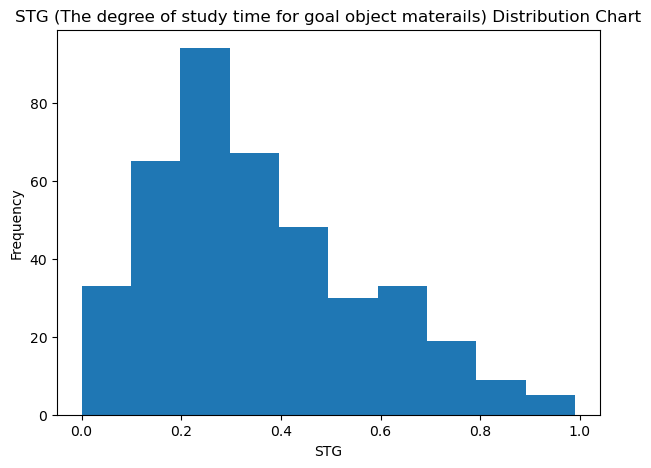

In [10]:
## STG Distribution
all_df['STG'].plot(kind='hist', bins=10,  figsize=(7,5))
plt.title('STG (The degree of study time for goal object materails) Distribution Chart')
plt.xlabel('STG')
plt.show()

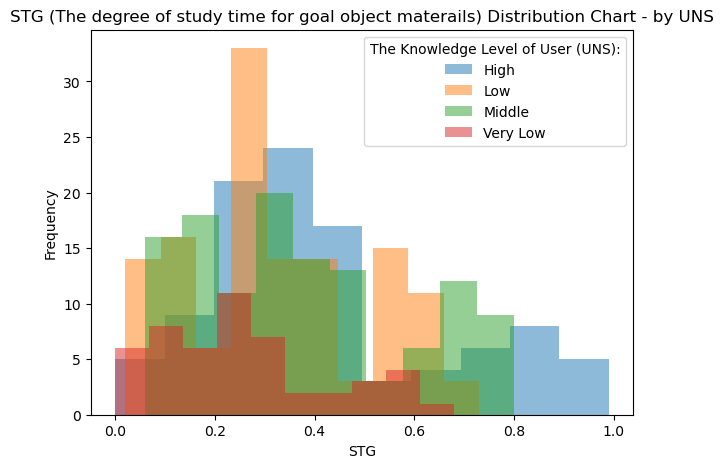

In [11]:
## STG Distribution by UNS
all_df.groupby('UNS')['STG'].plot(kind='hist', figsize=(7,5), legend=True, alpha=0.5)
plt.title('STG (The degree of study time for goal object materails) Distribution Chart - by UNS')
plt.xlabel('STG')
plt.legend( title='The Knowledge Level of User (UNS):')
plt.show()

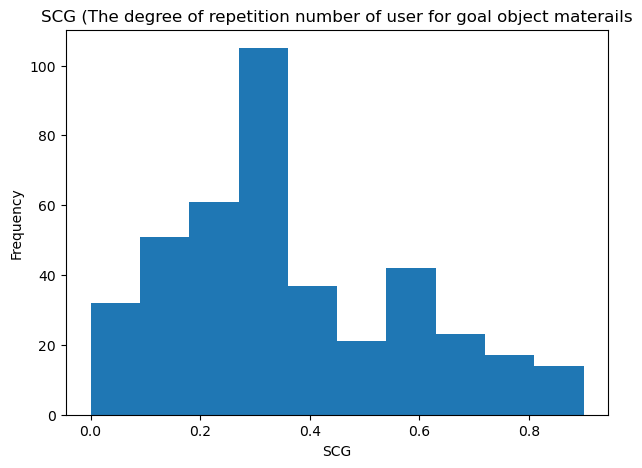

In [12]:
## SCG Distribution
all_df['SCG'].plot(kind='hist', bins=10,  figsize=(7,5))
plt.title('SCG (The degree of repetition number of user for goal object materails')
plt.xlabel('SCG')
plt.show()

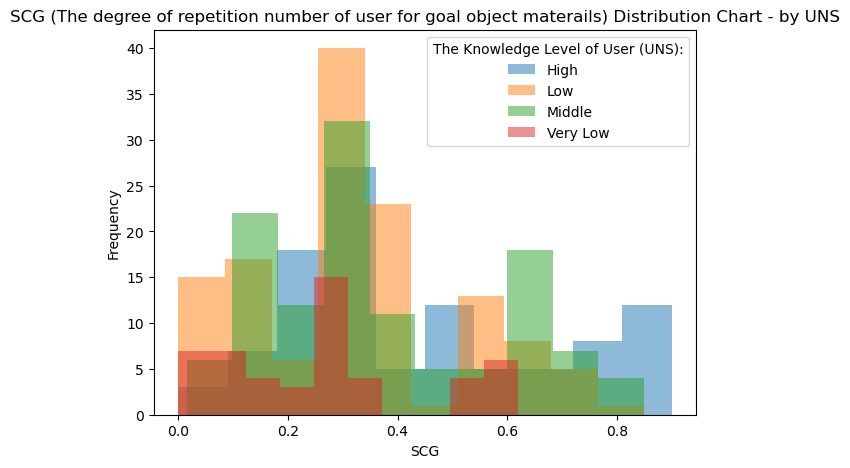

In [13]:
## SCG Distribution by UNS
all_df.groupby('UNS')['SCG'].plot(kind='hist', figsize=(7,5), legend=True, alpha=0.5)
plt.title('SCG (The degree of repetition number of user for goal object materails) Distribution Chart - by UNS')
plt.xlabel('SCG')
plt.legend( title='The Knowledge Level of User (UNS):')
plt.show()

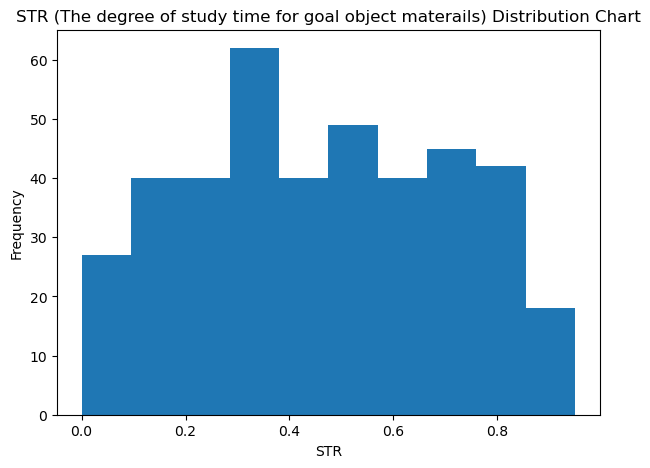

In [14]:
## STR Distribution
all_df['STR'].plot(kind='hist', bins=10,  figsize=(7,5))
plt.title('STR (The degree of study time for goal object materails) Distribution Chart')
plt.xlabel('STR')
plt.show()

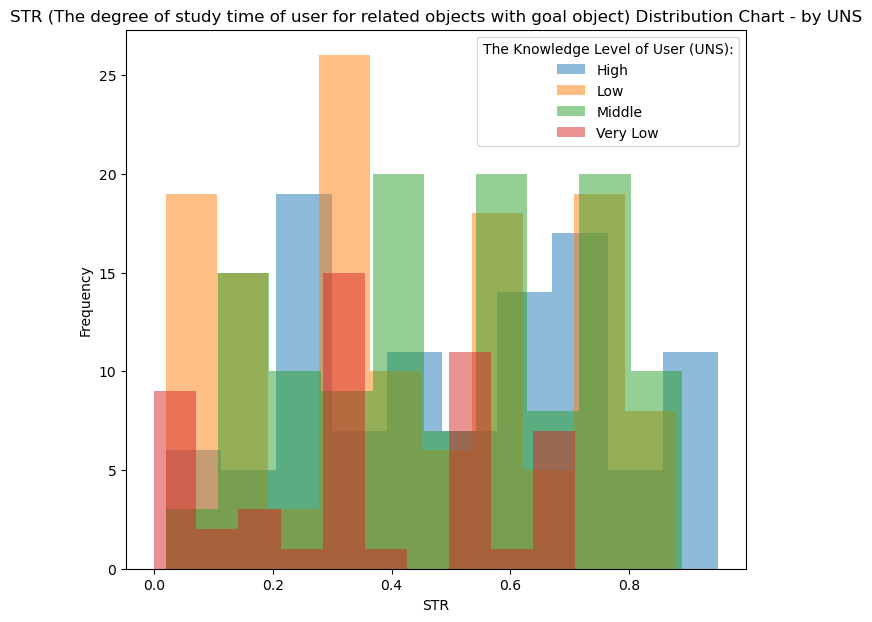

In [15]:
## STR Distribution by UNS
all_df.groupby('UNS')['STR'].plot(kind='hist', figsize=(8,7), legend=True, alpha=0.5)
plt.title('STR (The degree of study time of user for related objects with goal object) Distribution Chart - by UNS')
plt.xlabel('STR')
plt.legend( title='The Knowledge Level of User (UNS):')
plt.show()

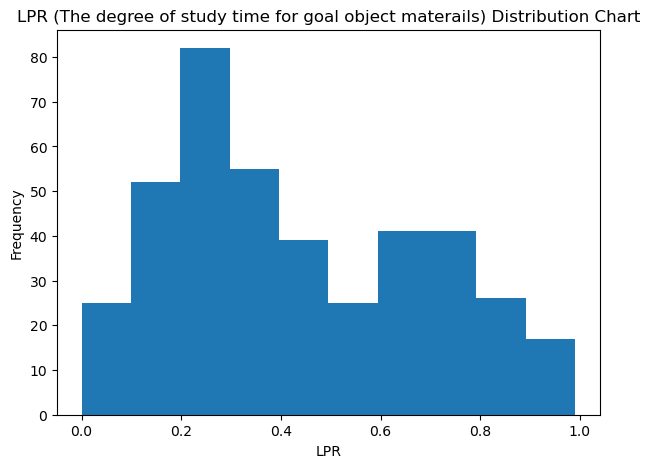

In [16]:
## LPR Distribution
all_df['LPR'].plot(kind='hist', bins=10,  figsize=(7,5))
plt.title('LPR (The degree of study time for goal object materails) Distribution Chart')
plt.xlabel('LPR')
plt.show()

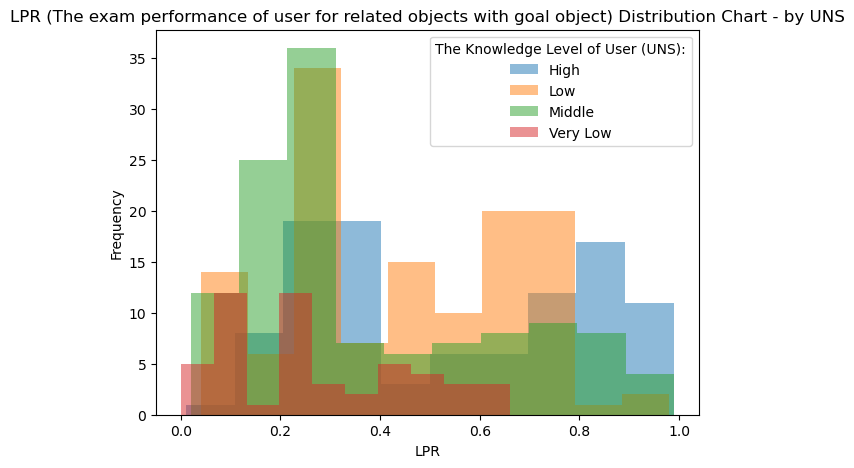

In [17]:
## LPR Distribution by UNS
all_df.groupby('UNS')['LPR'].plot(kind='hist', figsize=(7,5), legend=True, alpha=0.5)
plt.title('LPR (The exam performance of user for related objects with goal object) Distribution Chart - by UNS')
plt.xlabel('LPR')
plt.legend( title='The Knowledge Level of User (UNS):')
plt.show()

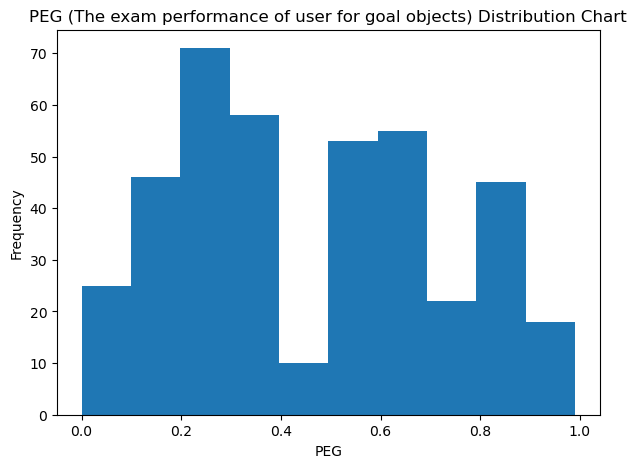

In [18]:
## PEG Distribution
all_df['PEG'].plot(kind='hist', bins=10,  figsize=(7,5))
plt.title('PEG (The exam performance of user for goal objects) Distribution Chart')
plt.xlabel('PEG')
plt.show()

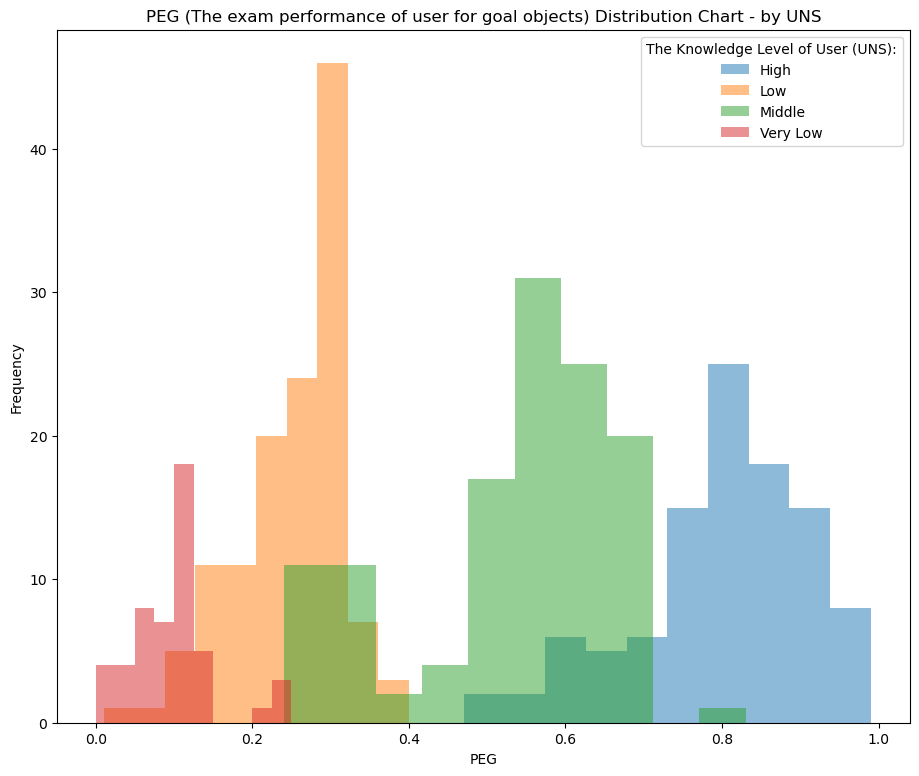

In [19]:
## PEG Distribution by UNS
all_df.groupby('UNS')['PEG'].plot(kind='hist', figsize=(11,9), legend=True, alpha=0.5)
plt.title('PEG (The exam performance of user for goal objects) Distribution Chart - by UNS')
plt.xlabel('PEG')
plt.legend( title='The Knowledge Level of User (UNS):')
plt.show()

# Task 3) Data Modelling - K-Means Clustering

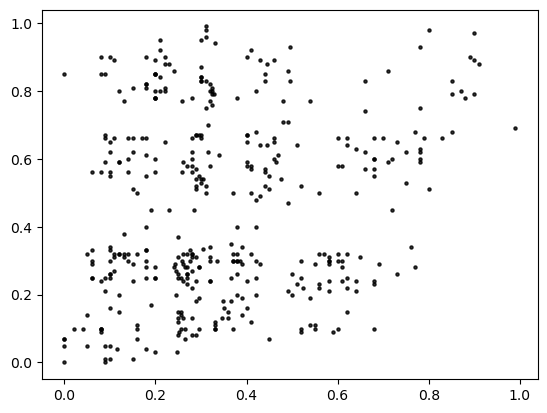

In [20]:
##K-Means Clustering on STG and PEG
##Reference: Week7 Lecture Example "Week7 - lectorial.ipynb"
from sklearn.cluster import KMeans
import math

## STG and PEG Distribution Scatter Chart
STG_PEG_df = all_df[['STG' , 'PEG']].iloc[: , :].values
plt.scatter(STG_PEG_df[:,0], STG_PEG_df[:, 1], c='k', alpha=0.8, s=5.0)
plt.show()

In [21]:
#initial the corresponding distances for each k value
k_dist = range(1,10)
print(k_dist)
k_disValues = np.zeros(len(k_dist))
print(k_disValues)

range(1, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


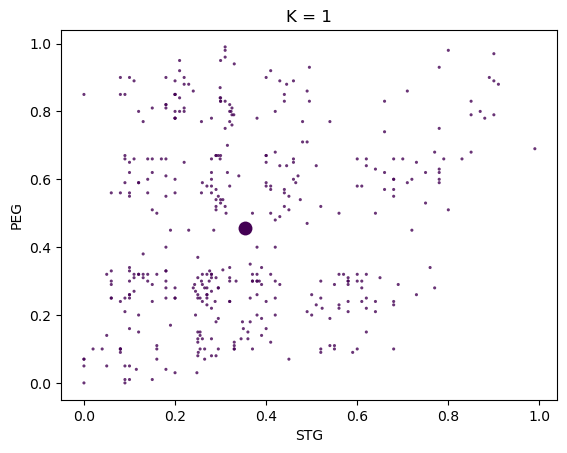

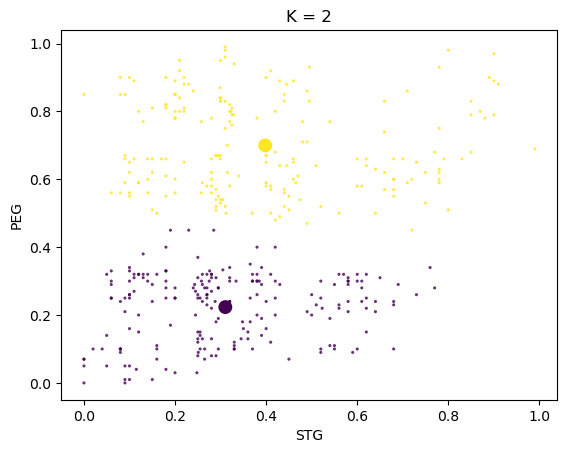

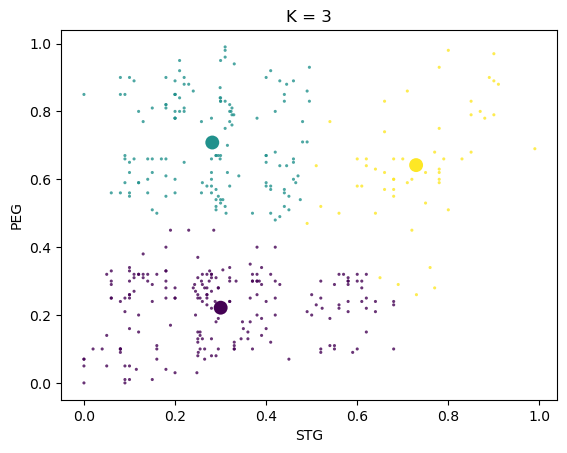

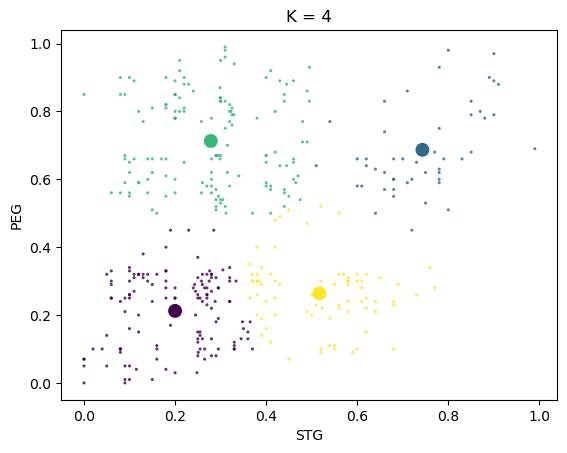

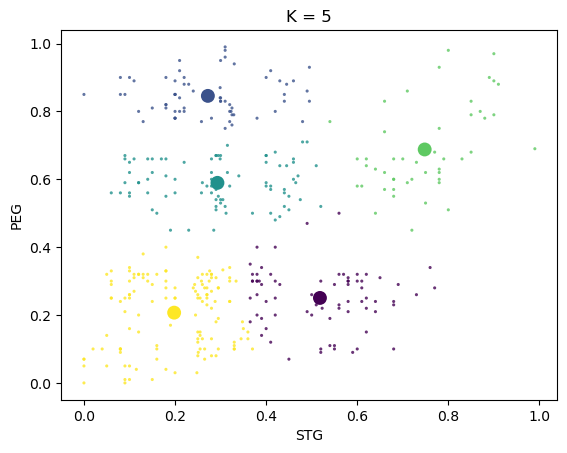

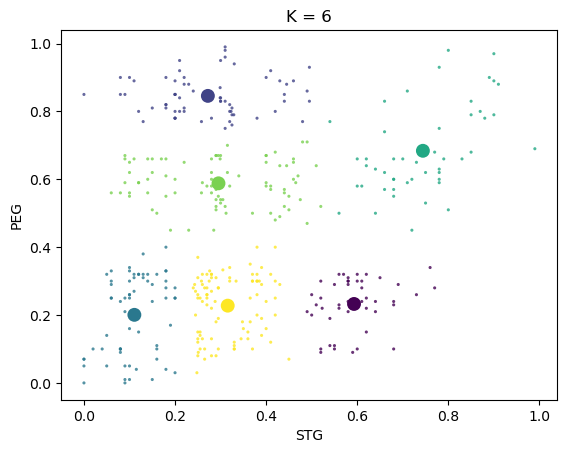

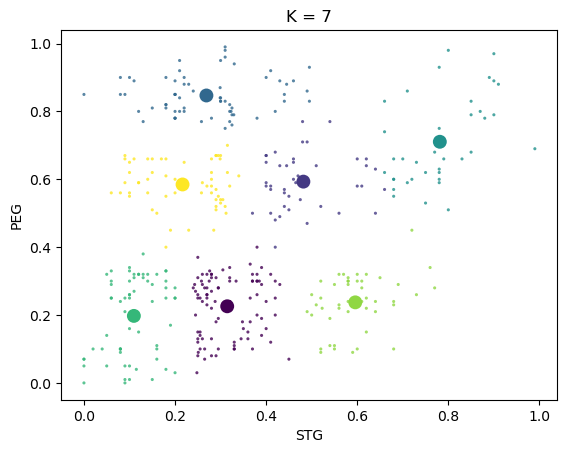

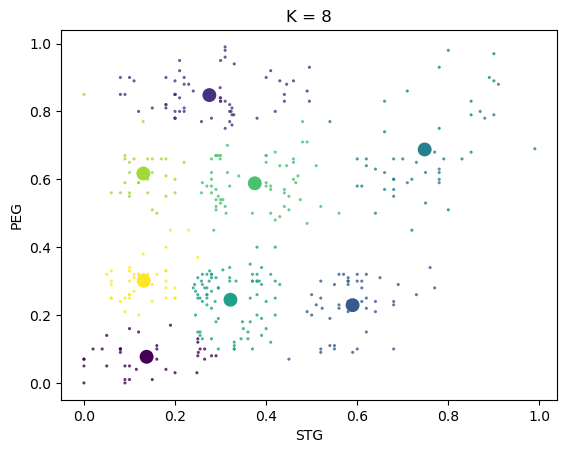

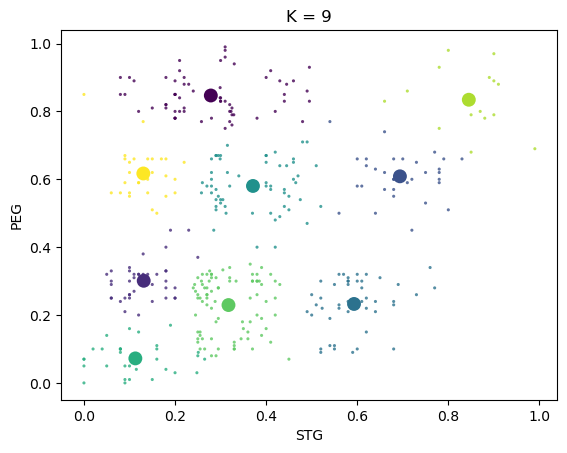

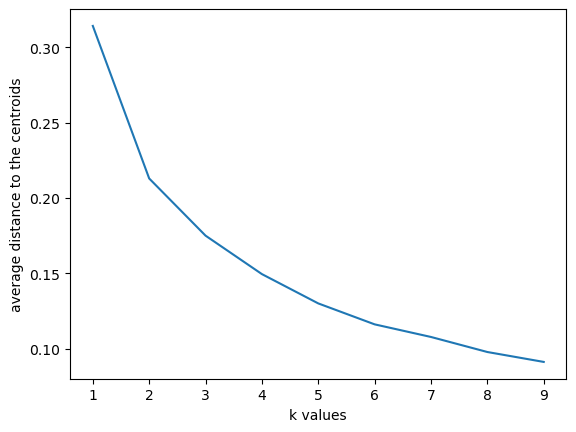

In [22]:
##K-Means Clustering
N_samples = 403
dataset_2 = STG_PEG_df
for cur_k_ind in range(0,len(k_dist)):
    #try each k value, starting from the first one with index 0
    K_dataset_2 = k_dist[cur_k_ind]
    km_2 = KMeans(n_clusters=K_dataset_2)
    labels_2=km_2.fit(dataset_2).labels_
    plt.scatter(dataset_2[:, 0], dataset_2[:, 1], s=5, c=labels_2, alpha=0.8, lw=0)
    plt.xlabel('STG')
    plt.ylabel('PEG')
    plt.title('K = '+ str(cur_k_ind+1))
    plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=100, c=np.unique(labels_2), lw=0.0)
    plt.show()
##    print("Cluster Centers: ", '\n', km_2.cluster_centers_)    
    
    #calculate the corresponding average distance to the centriods for this k value
    sumDis = 0
    for ind in range(0,N_samples):

        x1 = dataset_2[ind, 0]
        y1 = dataset_2[ind, 1]

        x2 = km_2.cluster_centers_[labels_2[ind], 0]
        y2 = km_2.cluster_centers_[labels_2[ind], 1]

        dis = math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2) * 1.0) 
    
        sumDis = sumDis + dis

    k_disValues[cur_k_ind] = sumDis/N_samples

plt.plot(k_dist, k_disValues)
plt.xlabel('k values')
plt.ylabel('average distance to the centroids')
plt.show() 

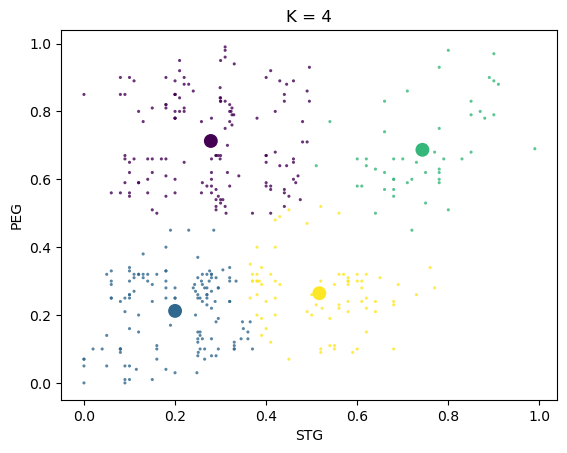

Cluster Centers:  
 [[0.27858042 0.71286713]
 [0.20008148 0.21224444]
 [0.743125   0.686875  ]
 [0.51685714 0.26428571]]
                   c
cluster target      
0       High      77
        Middle    66
1       Low       78
        Middle    17
        Very Low  40
2       High      24
        Middle    24
3       High       1
        Low       51
        Middle    15
        Very Low  10
The accuracy of prediction is:  0.4491315136476427


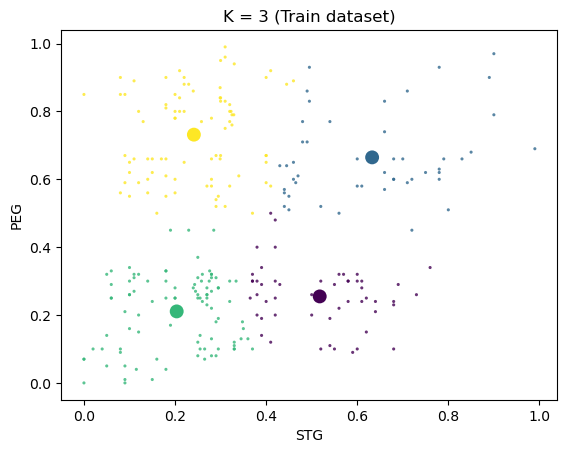

Cluster Centers:  
 [[0.51764151 0.25490566]
 [0.63270833 0.66458333]
 [0.20363542 0.21072917]
 [0.24137647 0.73152941]]


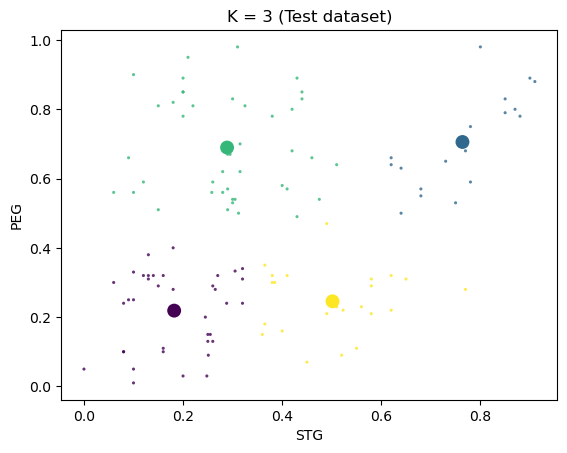

Cluster Centers:  
 [[0.18208108 0.21872973]
 [0.76388889 0.70555556]
 [0.28883721 0.68953488]
 [0.50165217 0.24565217]]


In [23]:
#Evalution
##Reference: Week7 Lecture Example "Week7 - lectorial.ipynb"

dataset_2 = STG_PEG_df
km_2 = KMeans(n_clusters=4)
labels_2=km_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:, 0], dataset_2[:, 1], s=5, c=labels_2, alpha=0.8, lw=0)
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=100, c=np.unique(labels_2), lw=0.0)
plt.xlabel('STG')
plt.ylabel('PEG')
plt.title('K = 4')
plt.show()
print('Cluster Centers: ', '\n', km_2.cluster_centers_)

X = pd.DataFrame(dataset_2)
model = KMeans(n_clusters = 4, random_state=14)
fit = model.fit(X)
X['cluster'] = fit.predict(X)
X['target'] = all_df[['UNS']].iloc[: , :].values
X['c'] = 'count'

clustering_result = X[['cluster', 'target', 'c']].groupby(['cluster','target']).agg('count')
print(clustering_result)

from sklearn.metrics import accuracy_score
X['target'] = list(map(lambda x: x.replace('Very Low', '1'), X['target']))
X['target'] = list(map(lambda x: x.replace('High', '2'), X['target']))
X['target'] = list(map(lambda x: x.replace('Middle', '0'), X['target']))
X['target'] = list(map(lambda x: x.replace('Low', '3'), X['target']))
X['target'] = X['target'].astype(int)
accuracy = accuracy_score(X['target'], X['cluster'])
print('The accuracy of prediction is: ', accuracy)

##Reference: Week6 Lecture Example "Week6-DecisionTreeExample.ipynb"
#split dataset in features and target variable
X = all_df[['STG','PEG']].iloc[: , :].values # Features
y = all_df[['UNS']].iloc[: , :].values # Target variable

# Split dataset into training set and test set (70% training and 30% test)
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# K Means on Train data set
dataset_2 = X_train
km_2 = KMeans(n_clusters=4)
labels_2=km_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:, 0], dataset_2[:, 1], s=5, c=labels_2, alpha=0.8, lw=0)
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=100, c=np.unique(labels_2), lw=0.0)
plt.xlabel('STG')
plt.ylabel('PEG')
plt.title('K = 3 (Train dataset)')
plt.show()
print('Cluster Centers: ', '\n', km_2.cluster_centers_)

# K Means on Test data set
dataset_2 = X_test
km_2 = KMeans(n_clusters=4)
labels_2=km_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:, 0], dataset_2[:, 1], s=5, c=labels_2, alpha=0.8, lw=0)
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=100, c=np.unique(labels_2), lw=0.0)
plt.xlabel('STG')
plt.ylabel('PEG')
plt.title('K = 3 (Test dataset)')
plt.show()
print('Cluster Centers: ', '\n', km_2.cluster_centers_)



# Task 4) Data Modelling - DBSCAN Clustering

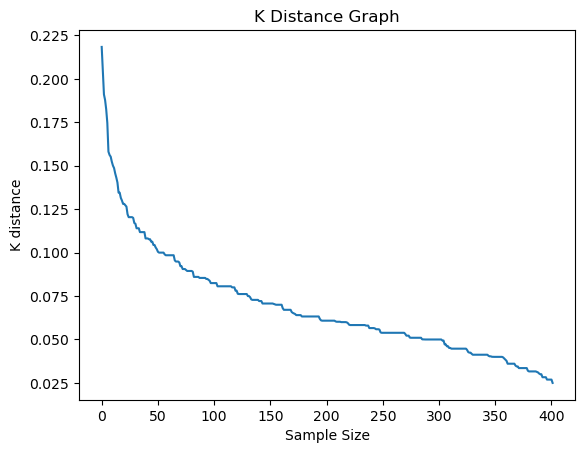

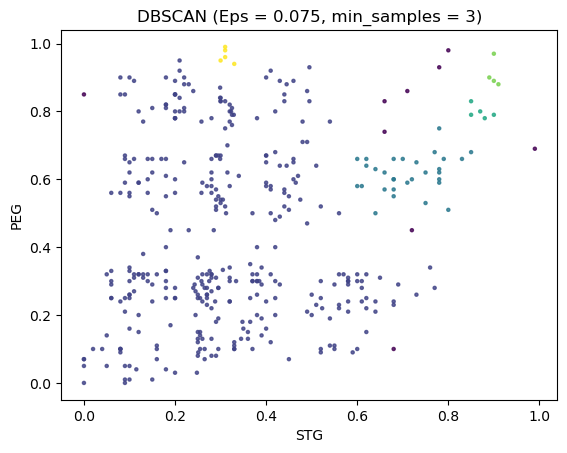

In [24]:
##DBSCAN Clustering
##Reference: Week8 Lecture Example "DBSCAN.ipynb"

#k distance graph
dataset_1 = STG_PEG_df
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors().fit(dataset_1)
distances, indices = nbrs.kneighbors(dataset_1, 20)
kDis = distances[:, 10]
kDis.sort()
kDis = kDis[list(range(len(kDis) - 1, 0, -1))]
plt.plot(kDis)
plt.xlabel('Sample Size')
plt.ylabel('K distance')
plt.title('K Distance Graph')
plt.show()

##DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=0.075, min_samples = 3)
labels_1 = dbs_1.fit(dataset_1).labels_
plt.scatter(dataset_1[:,0], dataset_1[:, 1], c=labels_1, alpha = 0.8, s=5.0)
plt.xlabel('STG')
plt.ylabel('PEG')
plt.title('DBSCAN (Eps = 0.075, min_samples = 3)')
plt.show()

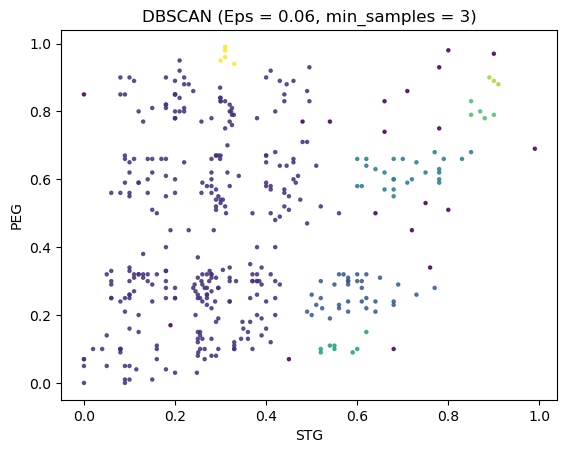

In [25]:
dbs_2 = DBSCAN(eps=0.06, min_samples = 3)
labels_1 = dbs_2.fit(dataset_1).labels_
plt.scatter(dataset_1[:,0], dataset_1[:, 1], c=labels_1, alpha = 0.8, s=5.0)
plt.xlabel('STG')
plt.ylabel('PEG')
plt.title('DBSCAN (Eps = 0.06, min_samples = 3)')
plt.show()